## 10 Images Segmentation without Augmentation.

In [1]:
!nvidia-smi

Thu May  4 20:46:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:

import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8 Model - (Instance Segmentation)

In [3]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

### Downloading our Custom Dataset from Roboflow.

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YvbvK3h0CpQqHS7qgc8V")
project = rf.workspace("nauman").project("scheme-auto-selection-10-images-per-class")
dataset = project.version(1).download("yolov8")





mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to scheme-auto-selection-10-images-per-class-1 in yolov8:: 100%|██████████| 211/211 [00:00<00:00, 1212.29it/s]


### Training on Custom Dataset

In [7]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8l-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/content
100% 88.1M/88.1M [00:00<00:00, 178MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/datasets/scheme-auto-selection-10-images-per-class-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

In [8]:
!ls {HOME}/runs/segment/train/

args.yaml					    results.csv
BoxF1_curve.png					    results.png
BoxP_curve.png					    train_batch0.jpg
BoxPR_curve.png					    train_batch1.jpg
BoxR_curve.png					    train_batch2.jpg
confusion_matrix.png				    train_batch450.jpg
events.out.tfevents.1683233281.bcf0251b2bc9.1453.0  train_batch451.jpg
MaskF1_curve.png				    train_batch452.jpg
MaskP_curve.png					    val_batch0_labels.jpg
MaskPR_curve.png				    val_batch0_pred.jpg
MaskR_curve.png					    weights


/content


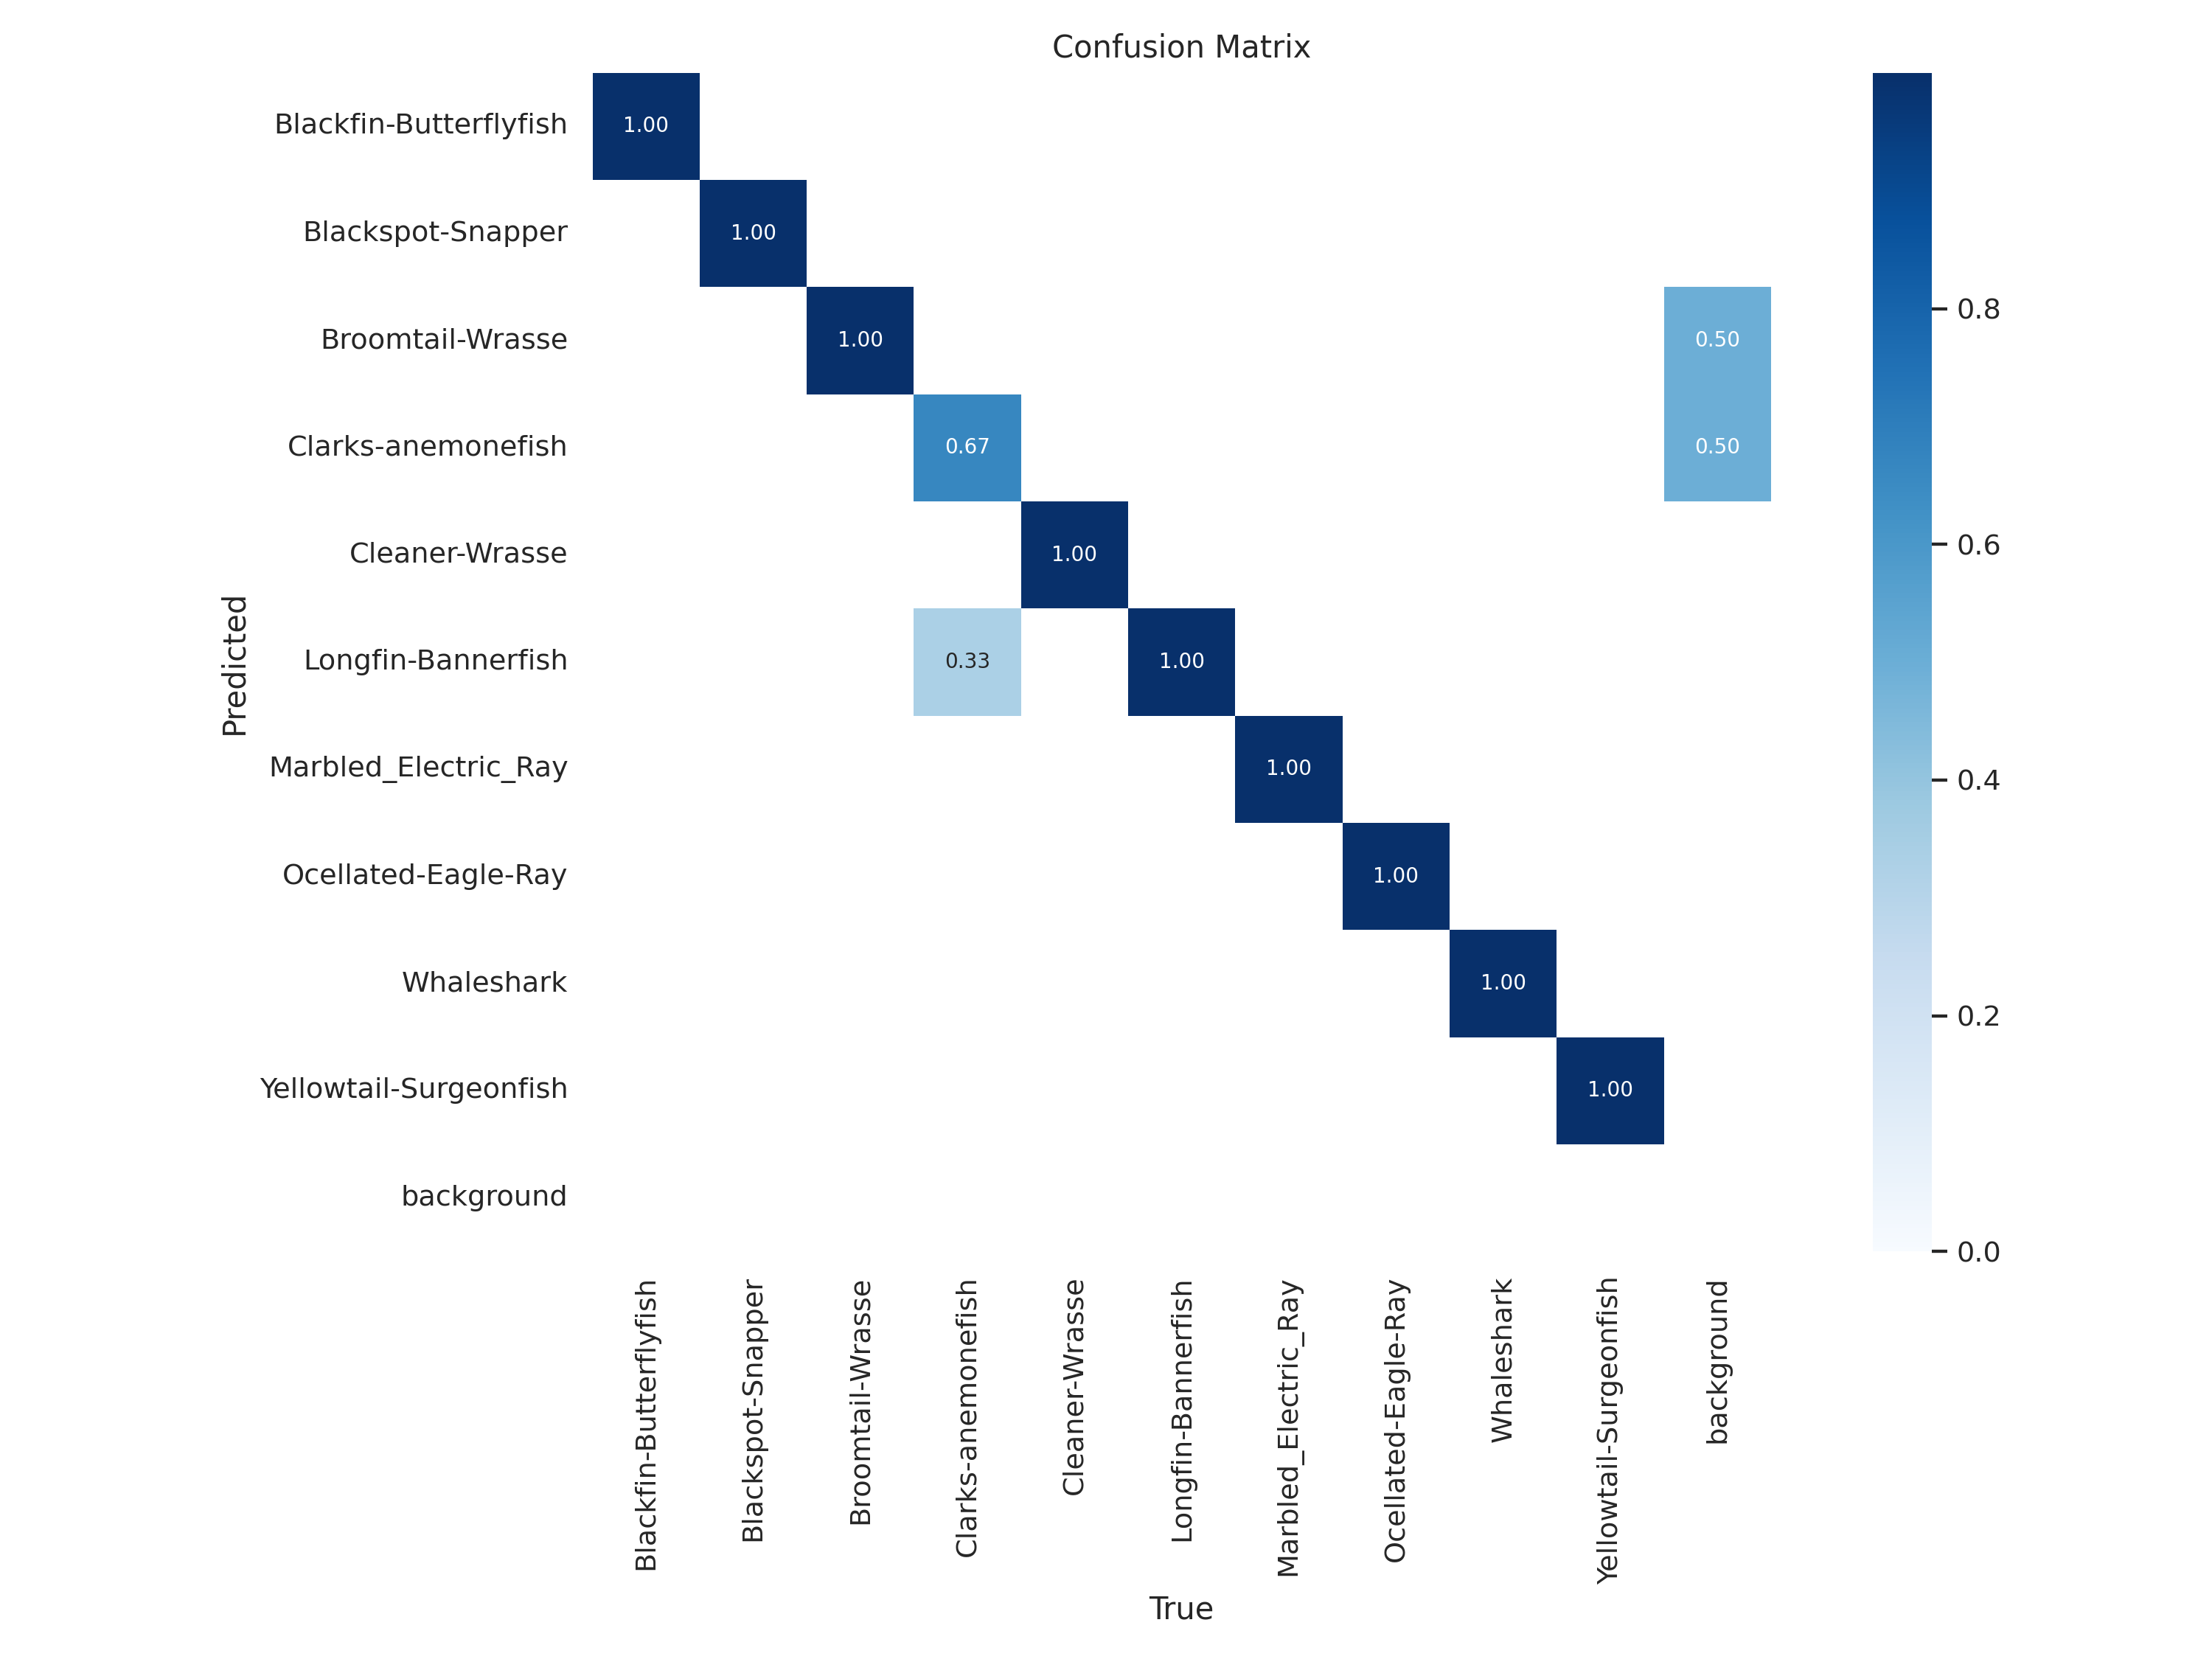

In [9]:
from IPython.display import display, Image

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


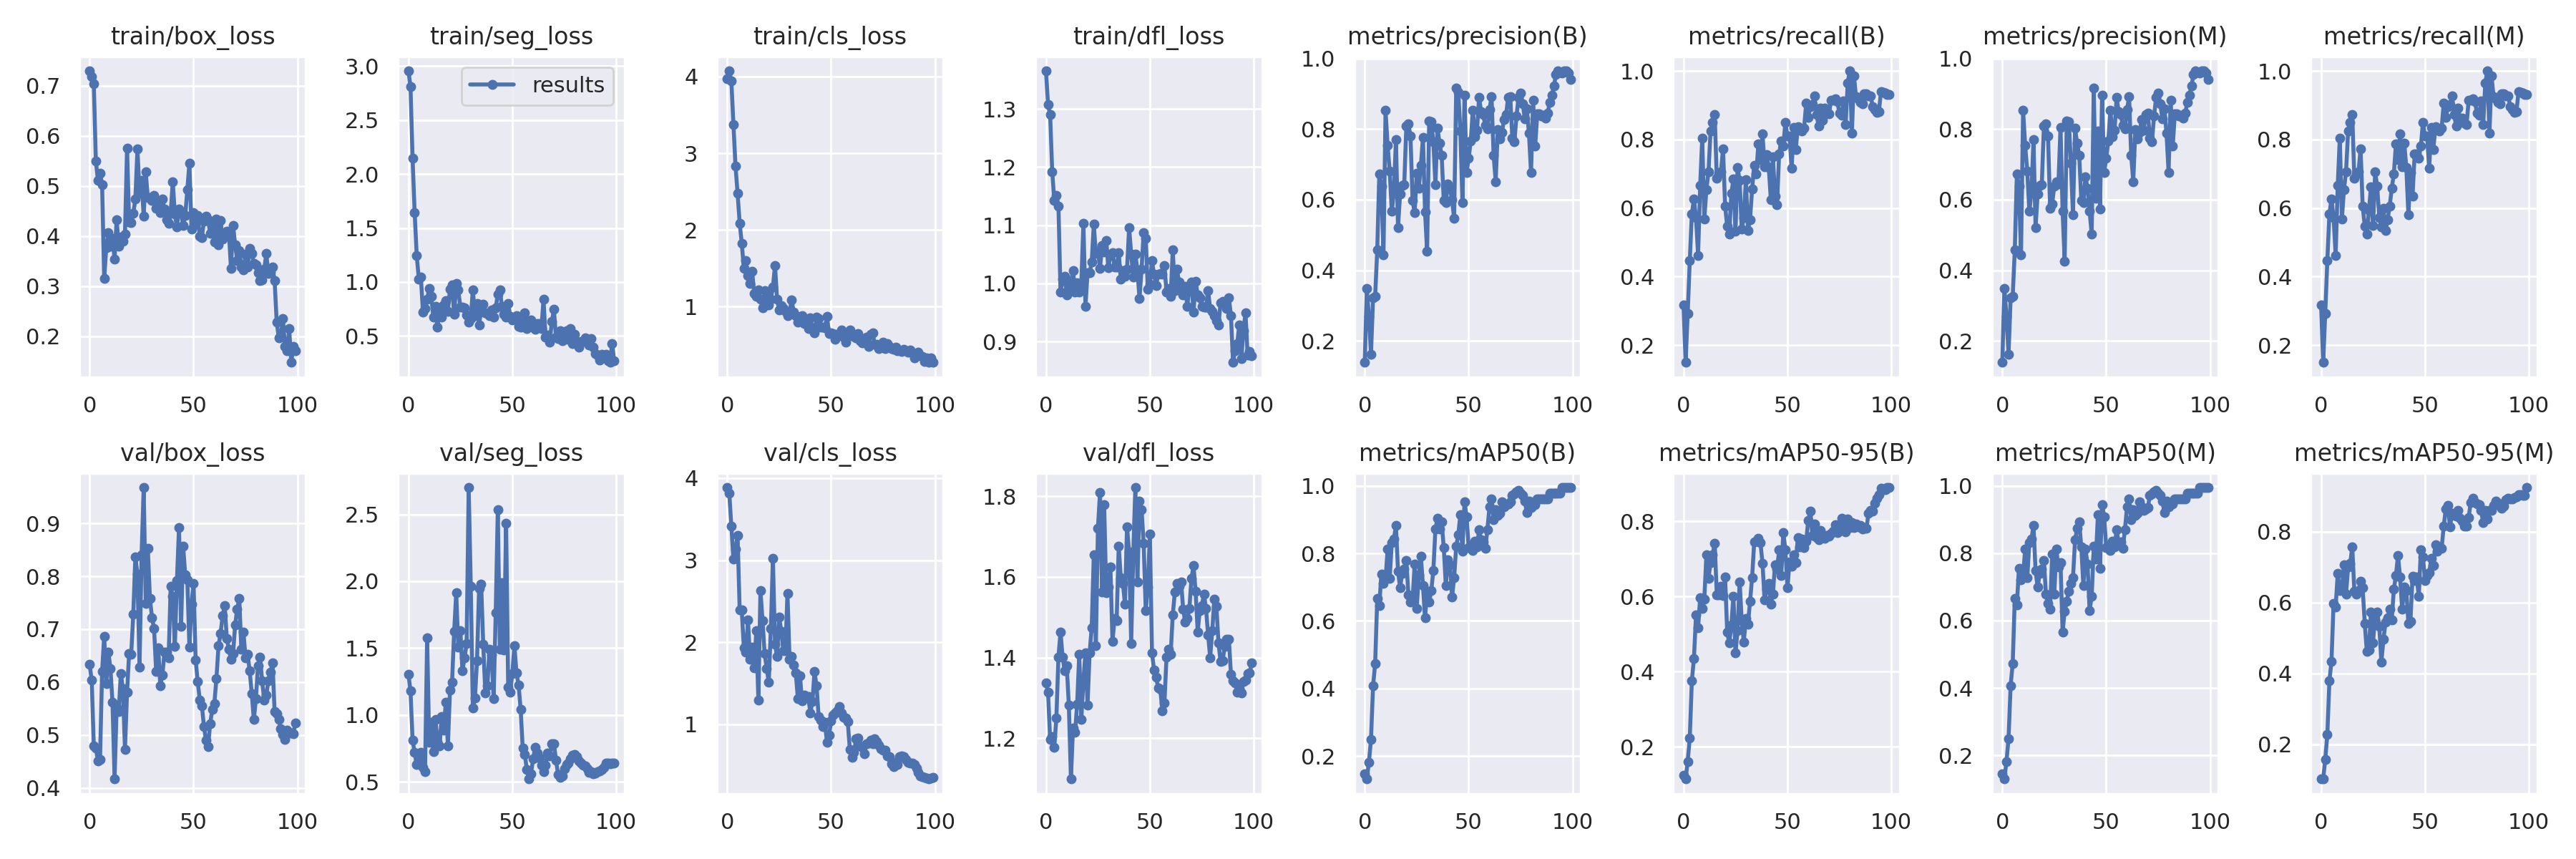

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


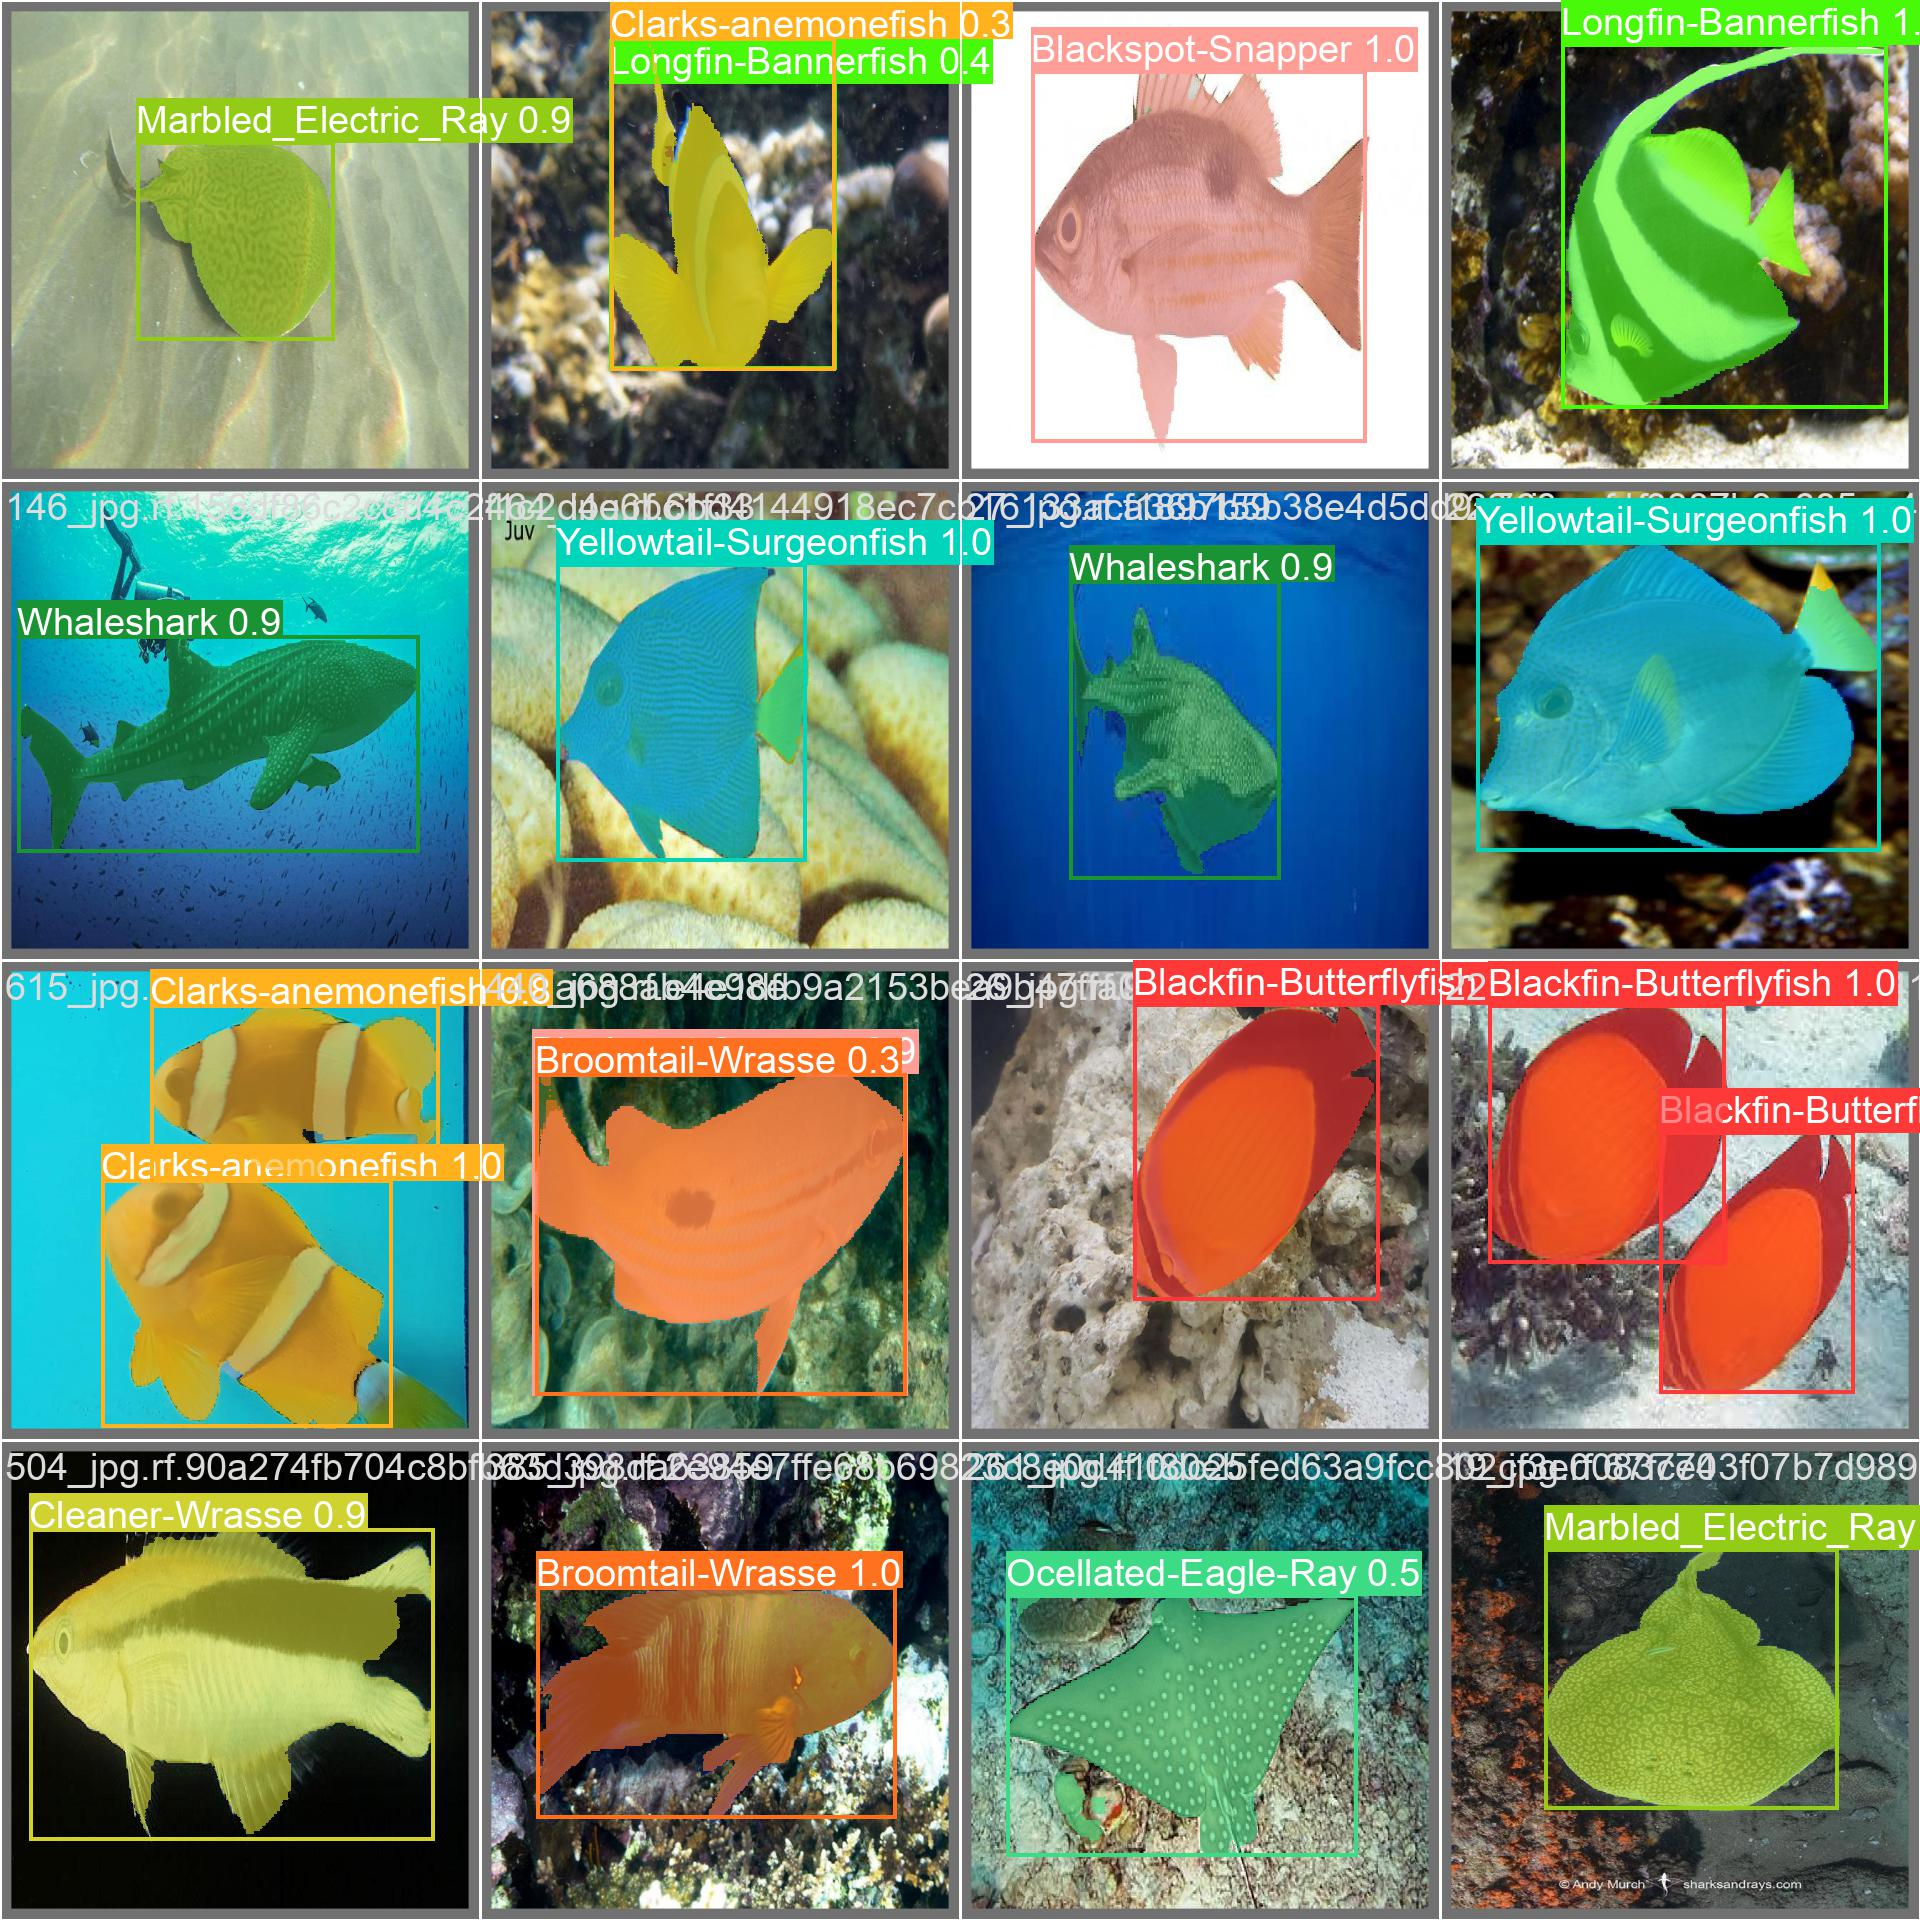

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

### Validate Custom Model

In [12]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-04 21:04:19.672425: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 21:04:21.565767: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45919598 parameters, 0 gradients, 220.2 GFLOPs
val: Scanning /content/datasets/scheme-auto-selection-10-images-per-class-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.35s/it]
                   all         20         22     

### Inference with Custom Model

In [13]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-05-04 21:04:42.271693: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 21:04:43.135830: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45919598 parameters, 0 gradients, 220.2 GFLOPs

image 1/10 /content/datasets/scheme-auto-selection-10-images-per-class-1/test/images/163_jpg.rf.35aa5d2fcc087e3e4b5eca4ac74e8bc6.jpg: 640x640 1 Longfin-Bannerfish, 77.2ms
image 2/10 /content/datasets/scheme-auto-selection-10-images-per-class-1/test/images/313_jpg.rf.e51bf75a6a228a84dc980c9cf7f0c73a.jpg: 640x640 1 Blackspot-Snapper, 58.1ms
image 3/10 /content/datasets/scheme-au

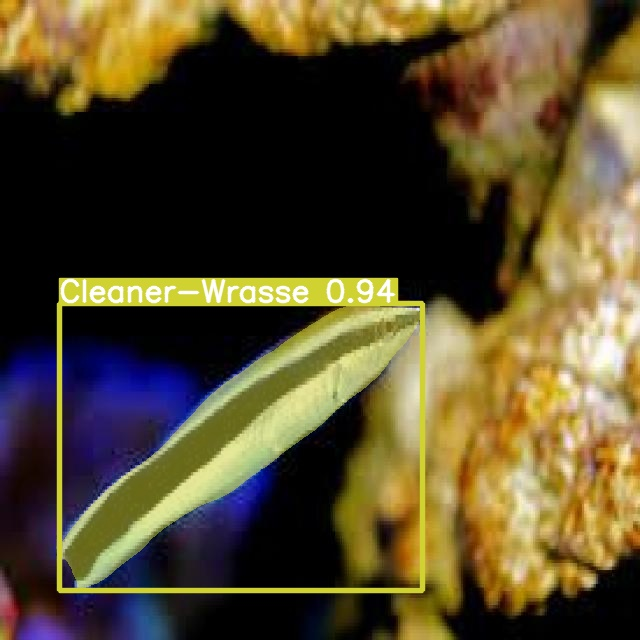

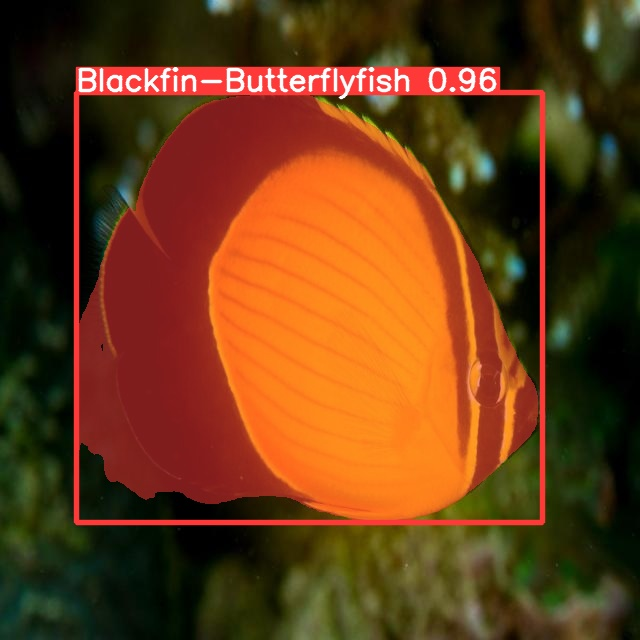

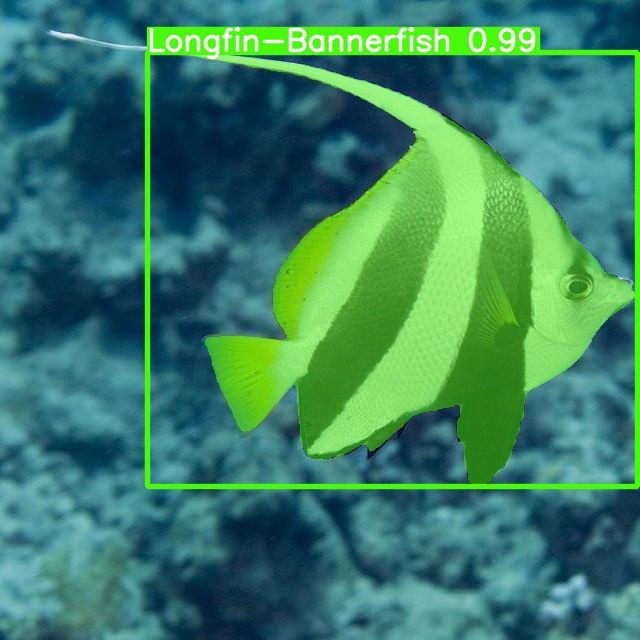

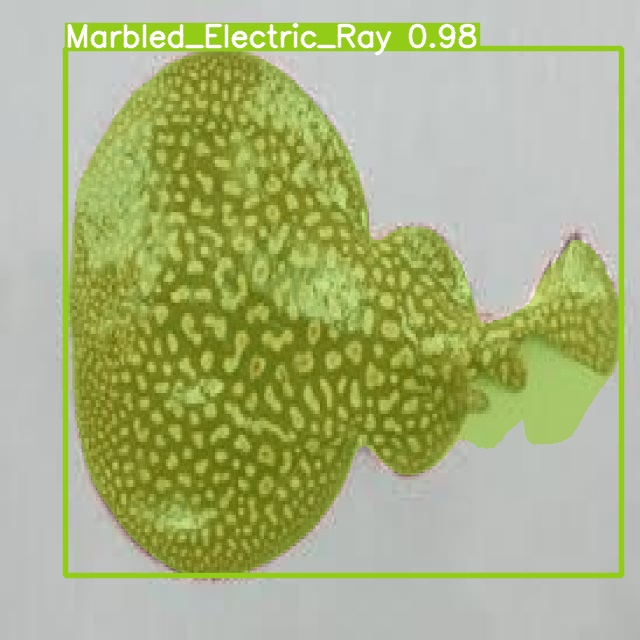

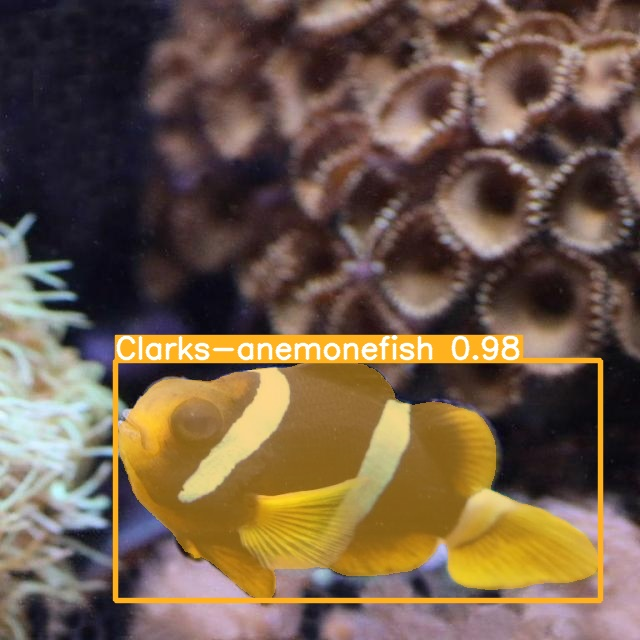

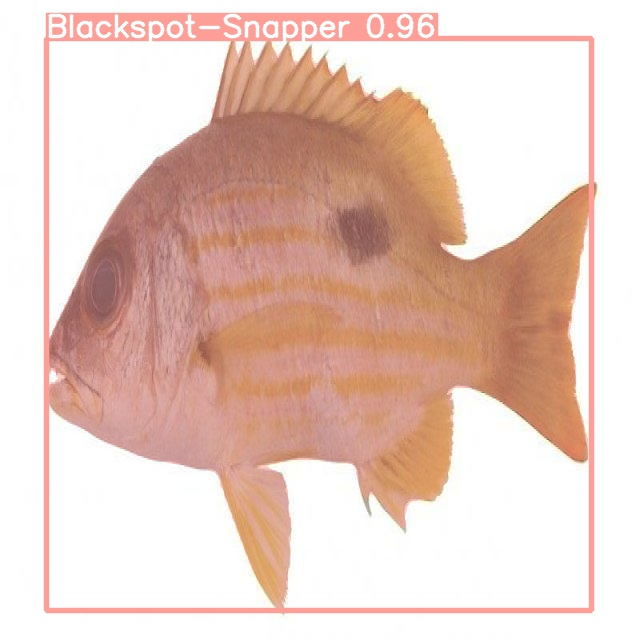

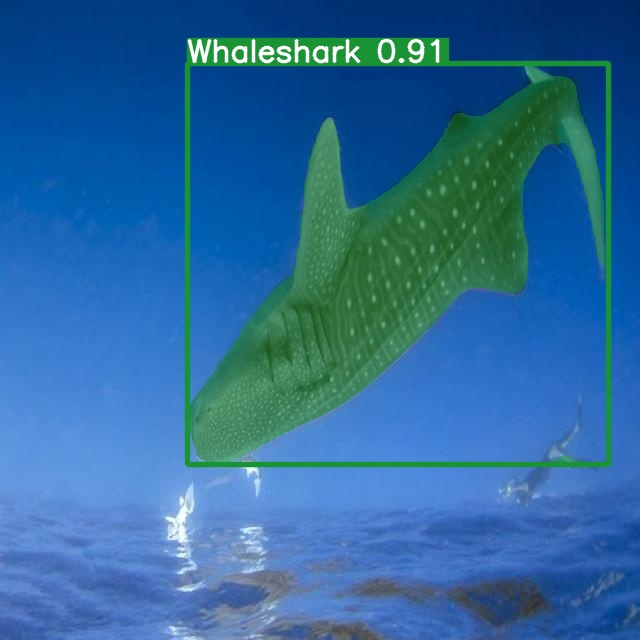

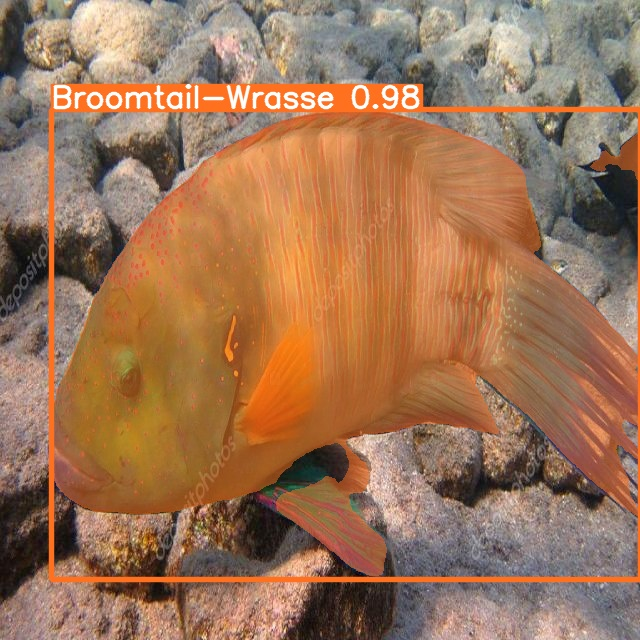

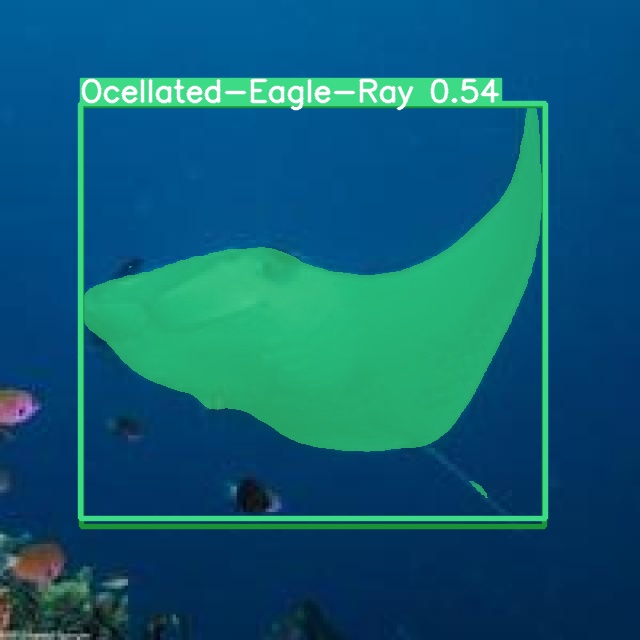

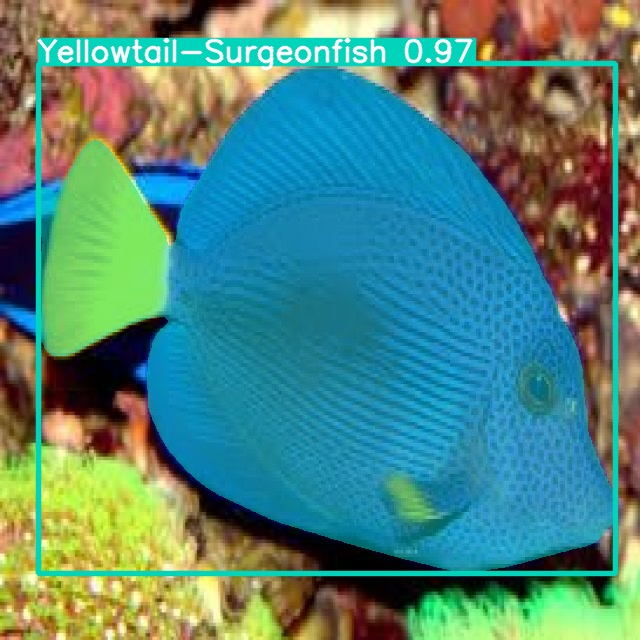

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:20]:
      display(Image(filename=image_path, height=600))
      print("\n")

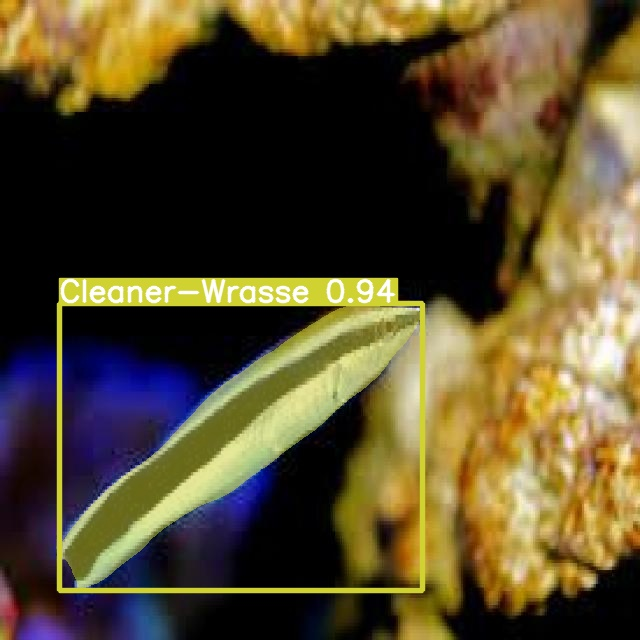

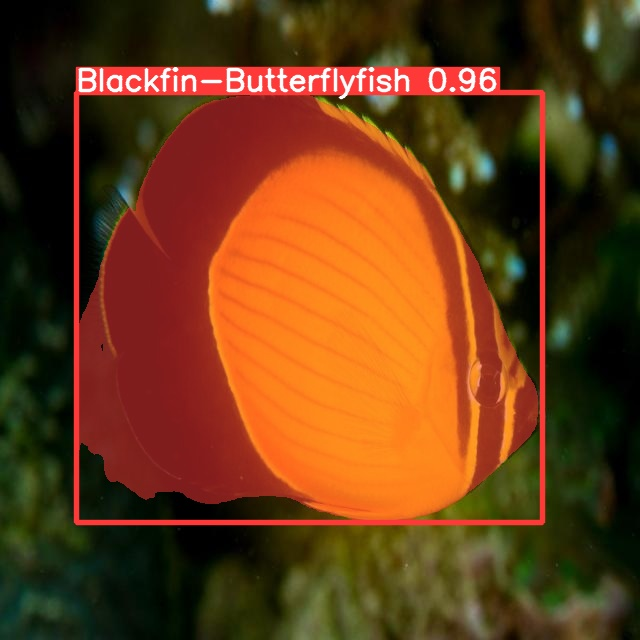

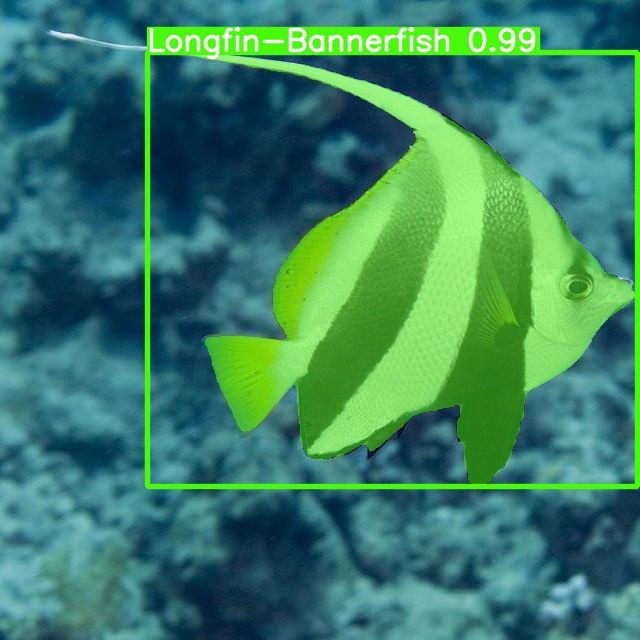

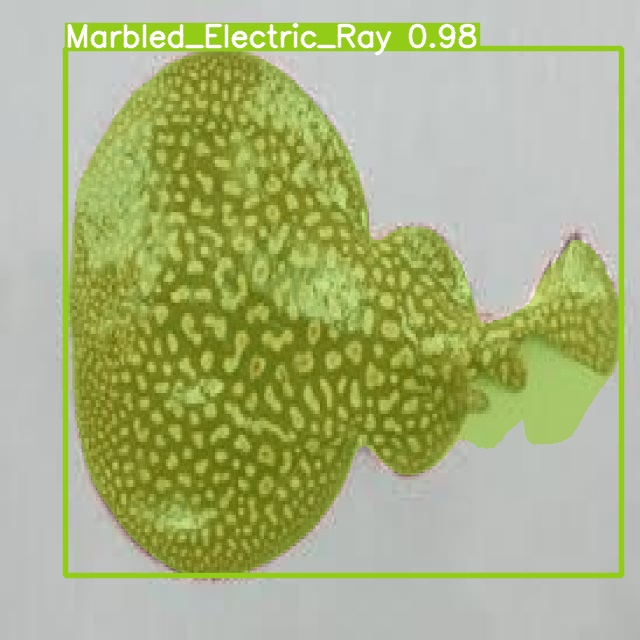

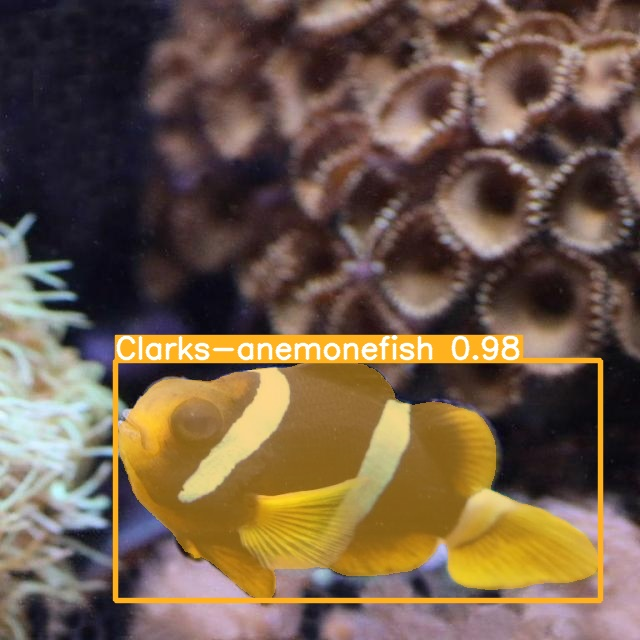

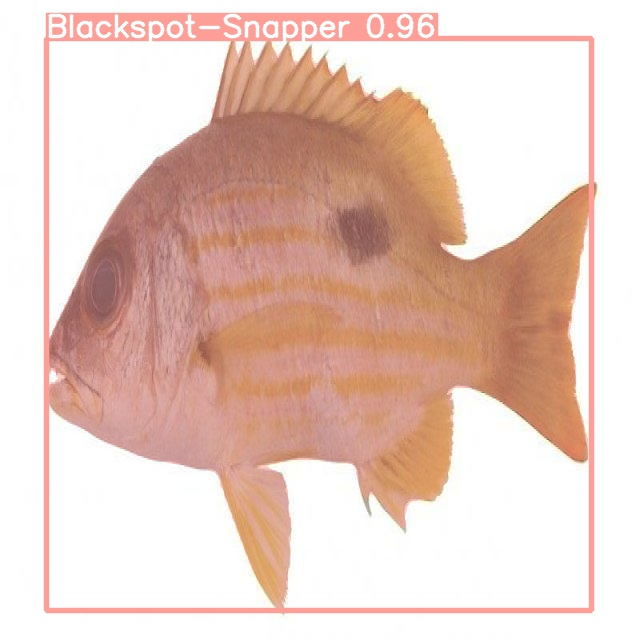

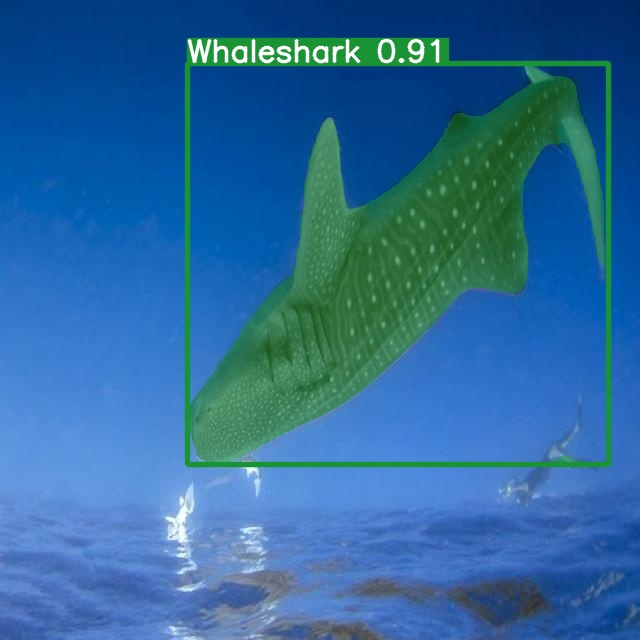

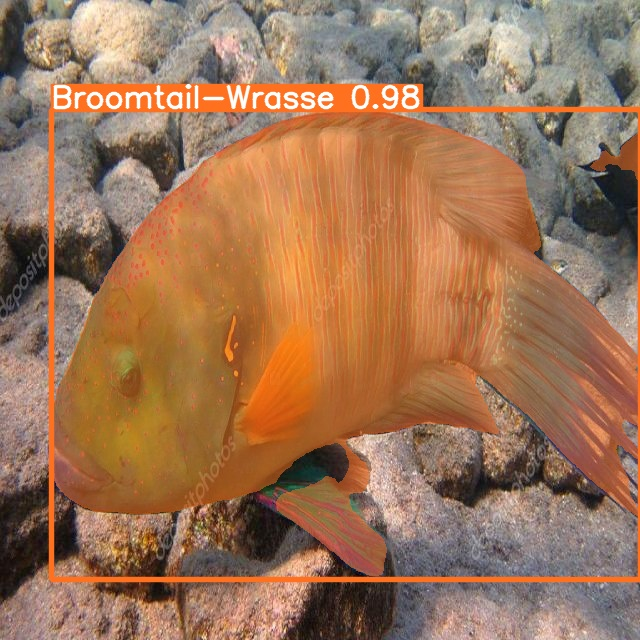

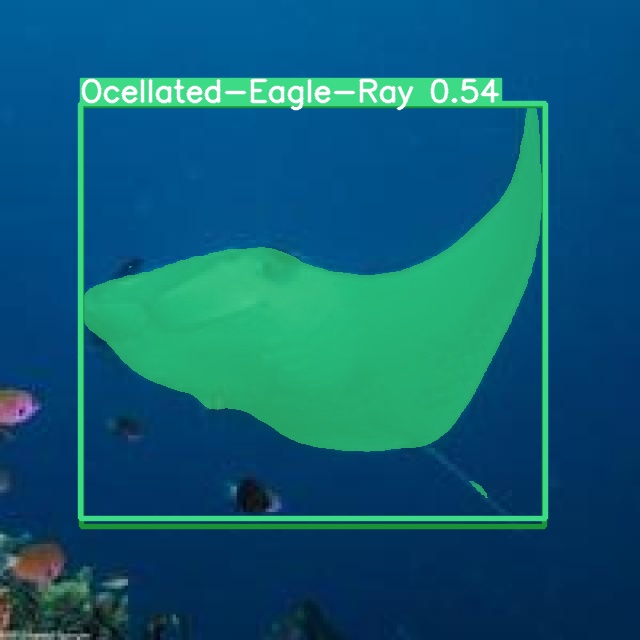

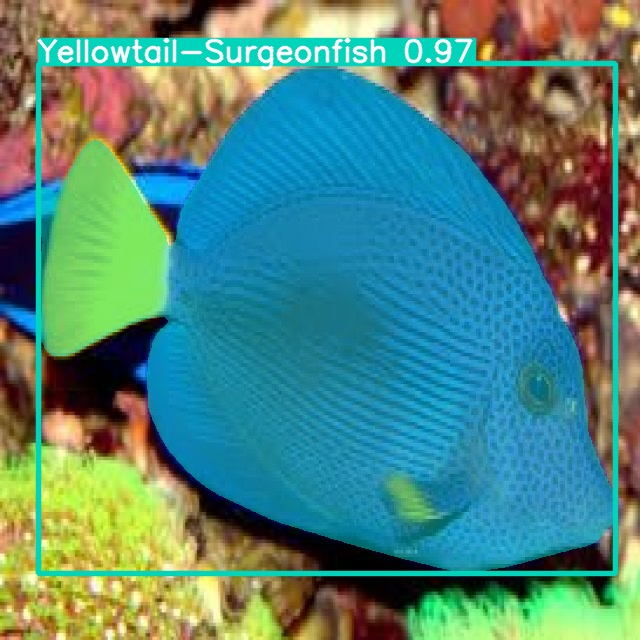

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:20]:
      display(Image(filename=image_path, height=600))
      print("\n")